In [26]:
import helper.visualization as viz
import helper.utils as utils
import io
import sys
import pandas as pd
import matplotlib.pyplot as plt
import tempfile
import numpy as np
import os
import itertools

In [43]:
trivials = {}
node_sizes = [250, 500]
mus = np.arange(0.1, 0.8, 0.1)
configuration_set = itertools.product(*[node_sizes, mus])
for ns, mu in configuration_set:
    G, pos = utils.generate_benchmark_graph(ns, mu)
    true_partition, true_communities = utils.extract_true_communities(G)
    pred_partition = dict(enumerate(true_partition))
    trivials[(str(ns), str(mu))] = utils.normalized_mutual_information(true_partition, pred_partition)
trivials

{('250', '0.1'): 0.5384428449381988,
 ('250', '0.2'): 0.5384428449381988,
 ('250', '0.30000000000000004'): 0.5384428449381988,
 ('250', '0.4'): 0.5384428449381987,
 ('250', '0.5'): 0.5384428449381987,
 ('250', '0.6'): 0.5384428449381988,
 ('250', '0.7000000000000001'): 0.5384428449381988,
 ('500', '0.1'): 0.6024951772953977,
 ('500', '0.2'): 0.6024951772953974,
 ('500', '0.30000000000000004'): 0.6024951772953974,
 ('500', '0.4'): 0.6024951772953977,
 ('500', '0.5'): 0.6024951772953974,
 ('500', '0.6'): 0.6024951772953974,
 ('500', '0.7000000000000001'): 0.6024951772953974}

In [44]:
data = []
preprocessed_data = None
transformed_data = None
# with tempfile.TemporaryFile('w') as summary_file:
for subdir, dirs, files in os.walk('.\data'):
    for file in files:
        curr_file_name = os.path.join(subdir, file)
        with io.open(curr_file_name) as curr_file:
            data.extend(curr_file.readlines())
preprocessed_data = (line.replace("\n", "") for line in data)
preprocessed_data = (line.split(",") for line in preprocessed_data)
preprocessed_data = ((method, N.strip(), mu.strip(), NMI.strip()) for method, N, mu, NMI in preprocessed_data)
transformed_data = list(preprocessed_data)
trivials_data = [(method, f"trivial_{N}", mu, trivials[(N, mu)]) for method, N, mu, NMI in transformed_data]

extended_data = transformed_data + trivials_data

aggregated_data = pd.DataFrame(extended_data, columns=("method", "N","µ","NMI"), dtype=np.float64)
aggregated_data

,method,N,µ,NMI
0,Coverage Maximization,250,0.1,1.000000
1,Coverage Maximization,250,0.2,0.525391
2,Coverage Maximization,250,0.3,0.429109
3,Coverage Maximization,250,0.4,0.000000
4,Coverage Maximization,250,0.5,0.000000
...,...,...,...,...
1989,Random Propagation,trivial_500,0.1,0.602495
1990,Random Propagation,trivial_500,0.5,0.602495
1991,Random Propagation,trivial_500,0.4,0.602495
1992,Random Propagation,trivial_500,0.6,0.602495


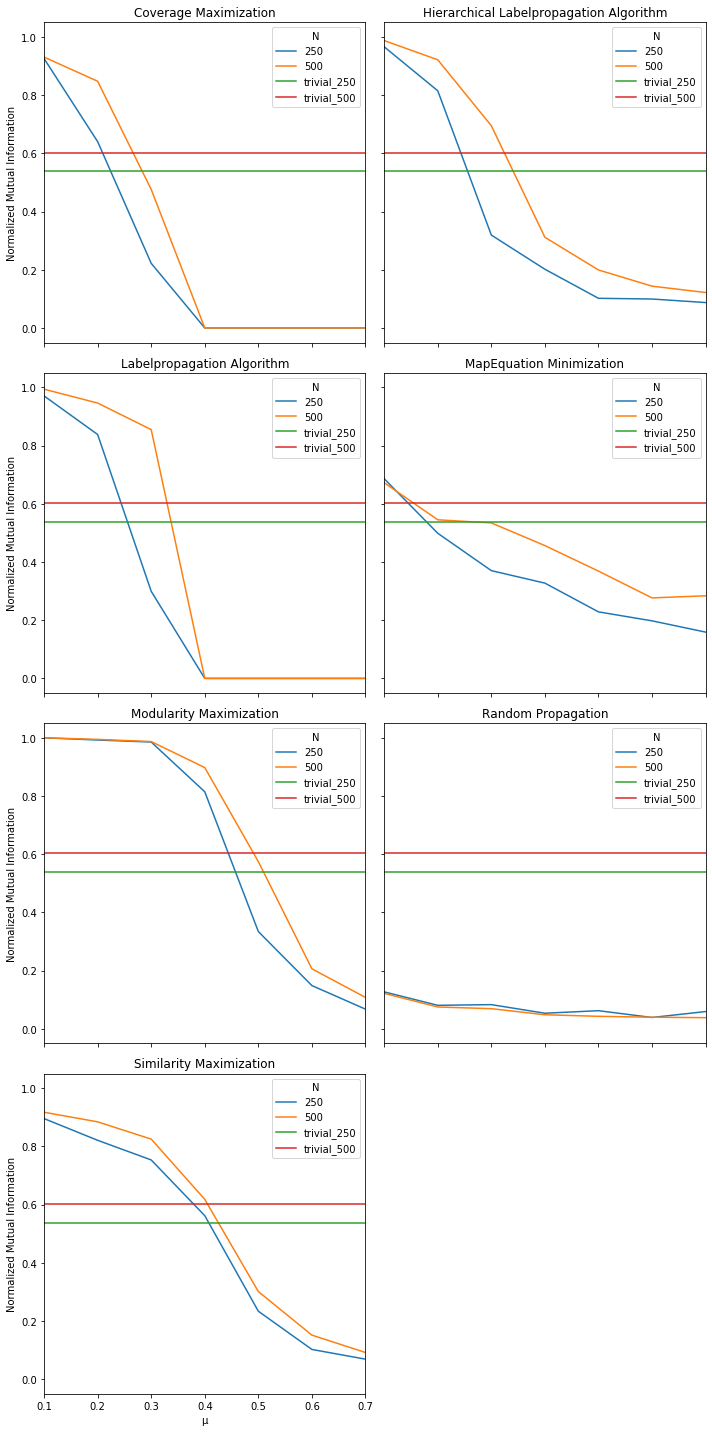

In [45]:
viz.draw_plots(aggregated_data)

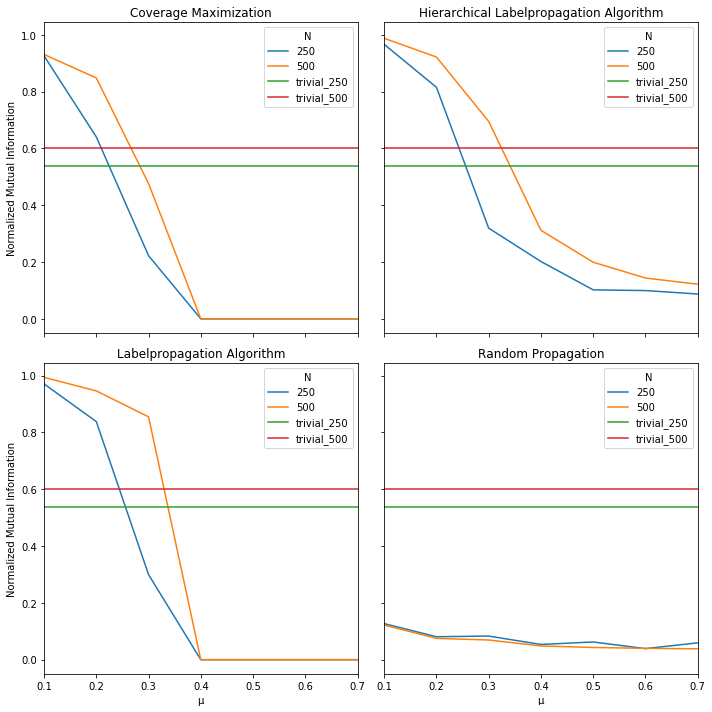

In [60]:
baselines = ["Coverage Maximization", "Labelpropagation Algorithm" ,"Hierarchical Labelpropagation Algorithm", "Random Propagation"]
# baseline_data = [(method, N, mu, NMI) for method, N, mu, NMI in aggregated_data if method in baselines]
baseline_data = aggregated_data.loc[aggregated_data["method"].isin(baselines)]
viz.draw_plots(baseline_data)

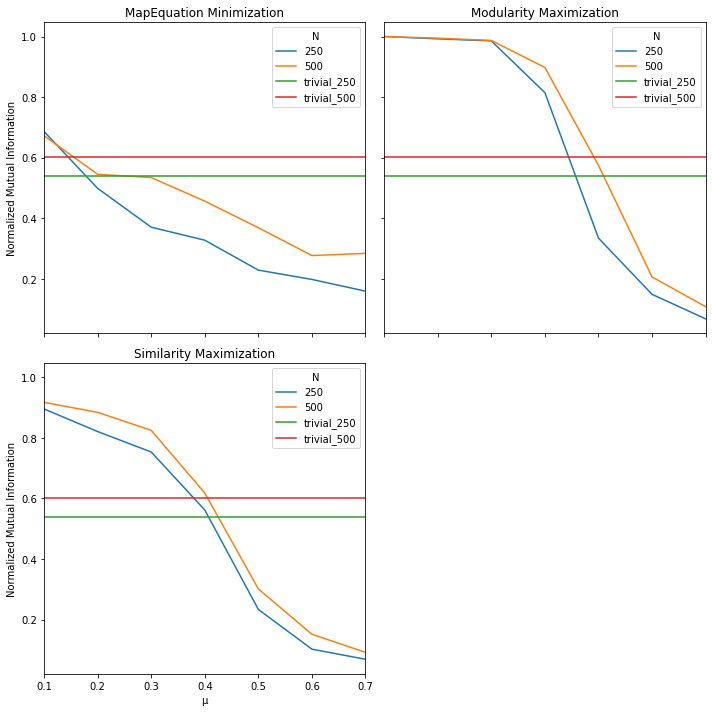

In [63]:
sophisticated_models = ["Similarity Maximization", "Modularity Maximization" ,"MapEquation Minimization"]
sophisticated_models_data = aggregated_data.loc[aggregated_data["method"].isin(sophisticated_models)]
viz.draw_plots(sophisticated_models_data)